# Basic Pandas Data Analysis

### week 1-2

* import excel data file
* preprocess imported data for time series analysis
* visualization with matplotlib and drawing insaights
* data sorting and meargng
* misleading visaulization example
* misleading forecast modeling example

> *Note 1. source code and data: KAIST Business school, Prof. Jaehoon Lee*\
> *Note 2. data entires in Korean are translated by me to English*\
> *Note 3. Markdown notes are primarily written by me*\
> *Note 4. Data files are provided in a separate folder in this repository*\
> *Note 5. week 1-1 was orientation*

# **From importing single data file to plotting it**

## **1. Importing data**
### How to import excel data into python and check with pandas methods

In [1]:
#conda install pandas
#conda instal openxyl #for excel file importing
#conda install statsmodels
#conda install matplotlib

In [2]:
import pandas as pd

In [3]:
#use your own file path where the excel file is stored
df_samsung = pd.read_excel('data/samsung_stock_price.xlsx')

In [4]:
#check first 5 rows to see whether it is properly imprted
df_samsung.head()

,date,symbol,entity_name,stock_price
0,2000/01/04,KRX:005930,Samsung_Electronics,6110
1,2000/01/05,KRX:005930,Samsung_Electronics,5580
2,2000/01/06,KRX:005930,Samsung_Electronics,5620
3,2000/01/07,KRX:005930,Samsung_Electronics,5540
4,2000/01/10,KRX:005930,Samsung_Electronics,5770


> *FYI: stock price is in KRW (Korean Won)*\
> symbol is stock ticker, and KRX stands for Korea Exchange

In [5]:
#check last 5 rows to see whether it is properly imprted
df_samsung.tail()

,date,symbol,entity_name,stock_price
5781,2023/06/02,KRX:006127,Samsung_Electronics,72200
5782,2023/06/05,KRX:006128,Samsung_Electronics,71700
5783,2023/06/07,KRX:006129,Samsung_Electronics,71000
5784,2023/06/08,KRX:006130,Samsung_Electronics,70900
5785,2023/06/09,KRX:006131,Samsung_Electronics,72000


In [6]:
#check the data type for each column
df_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5786 non-null   object
 1   symbol       5786 non-null   object
 2   entity_name  5786 non-null   object
 3   stock_price  5786 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 180.9+ KB


In [7]:
#summary statistics for numeric col
df_samsung.describe()

,stock_price
count,5786.000000
mean,26818.534393
std,21068.656166
min,2730.000000
25%,10705.000000
50%,18770.000000
75%,42650.000000
max,91000.000000


## **2. Data Preprocessing**
### Two important preprocessings for time series data analysis

### **2.1. Timestamp: convert date-string to datetime**

In [8]:
#check the first row of the data
df_samsung.loc[0]

date                    2000/01/04
symbol                  KRX:005930
entity_name    Samsung_Electronics
stock_price                   6110
Name: 0, dtype: object

In [9]:
#cehck the first column data from the first row of the data
df_samsung.loc[0]['date']

'2000/01/04'

In [10]:
#check the data type
type(df_samsung.loc[0]['date'])

str

> Currently, dates are mere strings\
> Need to covert dates into data type suited for time series data analysis\
> The data type for that is "pandas datetime"\
> This is called, **Timestamp** 

In [11]:
#Timestamp
df_samsung['date'] = pd.to_datetime(df_samsung['date'])

In [12]:
#Then, it will say it is timestamp, not mere string
df_samsung.loc[0]['date']

Timestamp('2000-01-04 00:00:00')

In [13]:
#Also, type function will celarly say it is Timestamp data type
type(df_samsung.loc[0]['date'])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
#before, 'date' was object Dtype. Now it is datatime64
df_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5786 non-null   datetime64[ns]
 1   symbol       5786 non-null   object        
 2   entity_name  5786 non-null   object        
 3   stock_price  5786 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 180.9+ KB


### **2.2. Indexing: Replace index with date**

In [15]:
#current: 0-indexed
df_samsung.head()

,date,symbol,entity_name,stock_price
0,2000-01-04,KRX:005930,Samsung_Electronics,6110
1,2000-01-05,KRX:005930,Samsung_Electronics,5580
2,2000-01-06,KRX:005930,Samsung_Electronics,5620
3,2000-01-07,KRX:005930,Samsung_Electronics,5540
4,2000-01-10,KRX:005930,Samsung_Electronics,5770


In [16]:
#Set datetime as index
df_samsung = df_samsung.set_index('date')

In [17]:
#now: date indexed (date is boldfaced)
df_samsung.head()

,symbol,entity_name,stock_price
date,,,
2000-01-04,KRX:005930,Samsung_Electronics,6110
2000-01-05,KRX:005930,Samsung_Electronics,5580
2000-01-06,KRX:005930,Samsung_Electronics,5620
2000-01-07,KRX:005930,Samsung_Electronics,5540
2000-01-10,KRX:005930,Samsung_Electronics,5770


In [18]:
#df_samsung.loc[0] #error : 0 is no more an index
df_samsung.loc['2020-01-10']

symbol                  KRX:005930
entity_name    Samsung_Electronics
stock_price                  59500
Name: 2020-01-10 00:00:00, dtype: object

#### **Slicing the dataframe for a range of dates**

In [19]:
df_samsung.loc['2020-03-01': '2020-03-10']

,symbol,entity_name,stock_price
date,,,
2020-03-02,KRX:005930,Samsung_Electronics,55000
2020-03-03,KRX:005930,Samsung_Electronics,55400
2020-03-04,KRX:005930,Samsung_Electronics,57400
2020-03-05,KRX:005930,Samsung_Electronics,57800
2020-03-06,KRX:005930,Samsung_Electronics,56500
2020-03-09,KRX:005930,Samsung_Electronics,54200
2020-03-10,KRX:005930,Samsung_Electronics,54600


## **3. Visualization**

In [20]:
import matplotlib.pyplot as plt

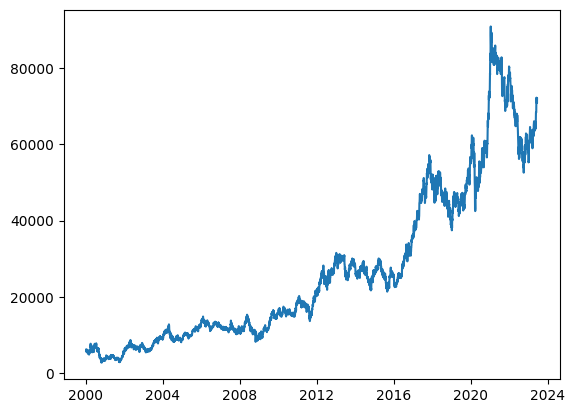

In [21]:
plt.plot(df_samsung['stock_price'])
plt.show()

### Event Study
#### Japan export restrictions: 2019-06-30
#### See its impact on the stock price of Samsung Electronics

> Note\
> There was a trade dispute between Japan and South Korea in 2019 starting with Japan imposing export restrictions on industrial matrials.

In [22]:
#sub sample
df_sub = df_samsung.loc['2019-06-20' : '2019-07-30']

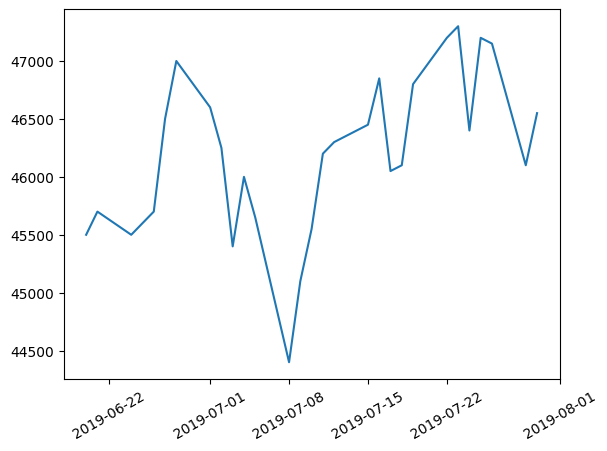

In [23]:
plt.plot(df_sub['stock_price'])

#tilt x-axis ticks
plt.xticks(rotation = 30)

plt.show()

> We can see the negative impact quickly dissipated and no prolonged impact is observed

The main purpose of visualization is to get across the author's argument to other people in a clear way. To do so, in this case, we are going to add an arrow to the graph indicating the specific time spot when the event occurred.

In [24]:
#first business day after the restriction annoncement on 2019-06-30
df_sub.loc['2019-06-30':].iloc[0]

symbol                  KRX:005930
entity_name    Samsung_Electronics
stock_price                  46600
Name: 2019-07-01 00:00:00, dtype: object

In [25]:
#store that information in a new object, event
event = df_sub.loc['2019-06-30':].iloc[0]

In [26]:
event.name

Timestamp('2019-07-01 00:00:00')

In [27]:
event['stock_price']

46600

In [28]:
# arrow
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10")

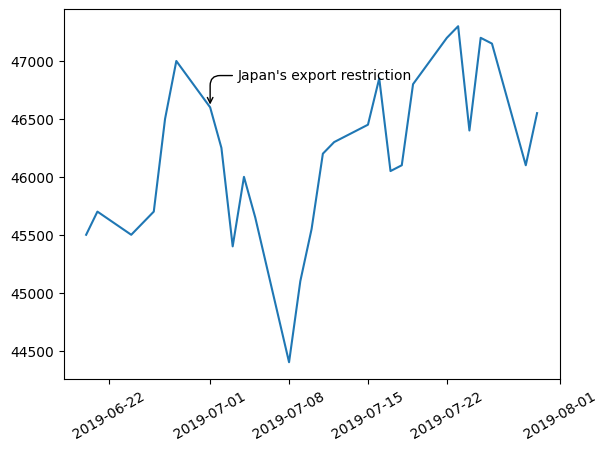

In [29]:
plt.plot(df_sub['stock_price'])
plt.xticks(rotation = 30)

plt.annotate(
    #double quote due to a single quote inside
    "Japan's export restriction",
    
    #date, price
    xy = (event.name, event['stock_price']),

    xytext = (20, 20),
    textcoords = 'offset points',

    #to add an arrow
    arrowprops = arrowprops,
)

plt.show()

> Now when exactly the event occured is clearly visible

# **From importing two data files to comparing and plotting them**

## **1. Import two data files and merge them**

In [30]:
#import additional excel data file
df_lg = pd.read_excel('data/lg_stock_price.xlsx')

In [31]:
#preprocess I -> timestamp
df_lg['date'] = pd.to_datetime(df_lg['date'])

In [32]:
#preprocess II -> date indexing
df_lg = df_lg.set_index('date')

In [33]:
#check the first 5 rows
df_lg.head()

,symbol,entity_name,stock_price
date,,,
2002-04-22,KRX:066570,LG_Electronics,62936
2002-04-23,KRX:066570,LG_Electronics,57463
2002-04-24,KRX:066570,LG_Electronics,55704
2002-04-25,KRX:066570,LG_Electronics,51209
2002-04-26,KRX:066570,LG_Electronics,53554


In [34]:
#check the previous date fire
df_samsung.head()

,symbol,entity_name,stock_price
date,,,
2000-01-04,KRX:005930,Samsung_Electronics,6110
2000-01-05,KRX:005930,Samsung_Electronics,5580
2000-01-06,KRX:005930,Samsung_Electronics,5620
2000-01-07,KRX:005930,Samsung_Electronics,5540
2000-01-10,KRX:005930,Samsung_Electronics,5770


#### **Rename columns to prevent duplicate columns**

In [35]:
df_samsung = df_samsung.rename(columns = {'stock_price' : 'samsung'})

In [36]:
df_samsung.head(2)

,symbol,entity_name,samsung
date,,,
2000-01-04,KRX:005930,Samsung_Electronics,6110
2000-01-05,KRX:005930,Samsung_Electronics,5580


In [37]:
df_lg = df_lg.rename(columns = {'stock_price' : 'lg'})

In [38]:
df_lg.head(2)

,symbol,entity_name,lg
date,,,
2002-04-22,KRX:066570,LG_Electronics,62936
2002-04-23,KRX:066570,LG_Electronics,57463


#### **Take only necessary columns from each table**

In [39]:
df_samsung = df_samsung[['samsung']]

> **Note: double bracket**\
> If single bracket is used, a single column will be extracted, which is not a pandas dataframe but pandas series.\
> If you happned to use single bracket, you need to convert it back to pandas dataframe. This process is presented below.

In [40]:
#df_samsung = df_samsung['samsung'].to_frame()

In [41]:
#do the same for LG data
df_lg = df_lg[['lg']]

In [42]:
df_samsung.head(3)

,samsung
date,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620


In [43]:
df_lg.head(3)

,lg
date,
2002-04-22,62936
2002-04-23,57463
2002-04-24,55704


#### **Merge two dataframes**

1. Left join
2. Right join
3. Outher join
4. Inner join

In [44]:
#left join
df_samsung.join(df_lg)

,samsung,lg
date,,
2000-01-04,6110,NaN
2000-01-05,5580,NaN
2000-01-06,5620,NaN
2000-01-07,5540,NaN
2000-01-10,5770,NaN
...,...,...
2023-06-02,72200,123100.0
2023-06-05,71700,127200.0
2023-06-07,71000,125700.0


In [45]:
#inner join
df_samsung.join(df_lg, how = 'inner')

,samsung,lg
date,,
2002-04-22,8200,62936
2002-04-23,8540,57463
2002-04-24,8640,55704
2002-04-25,8260,51209
2002-04-26,8000,53554
...,...,...
2023-06-02,72200,123100
2023-06-05,71700,127200
2023-06-07,71000,125700


In [46]:
#right join
df_samsung.join(df_lg, how = 'right')

,samsung,lg
date,,
2002-04-22,8200,62936
2002-04-23,8540,57463
2002-04-24,8640,55704
2002-04-25,8260,51209
2002-04-26,8000,53554
...,...,...
2023-06-02,72200,123100
2023-06-05,71700,127200
2023-06-07,71000,125700


In [47]:
#we use left join in this case
df_merged = df_samsung.join(df_lg)

#### **Drop null values**

In [48]:
df_merged.dropna()

,samsung,lg
date,,
2002-04-22,8200,62936.0
2002-04-23,8540,57463.0
2002-04-24,8640,55704.0
2002-04-25,8260,51209.0
2002-04-26,8000,53554.0
...,...,...
2023-06-02,72200,123100.0
2023-06-05,71700,127200.0
2023-06-07,71000,125700.0


In [49]:
df_merged = df_merged.dropna()

## **2. Visualization**

### 2.1. Misleading visualization example

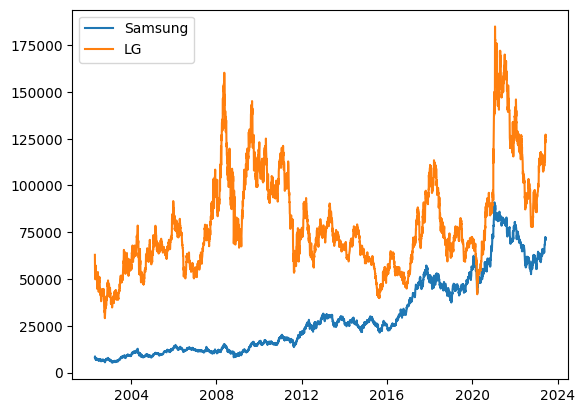

In [50]:
plt.plot(df_merged['samsung'], label = "Samsung")
plt.plot(df_merged['lg'], label = "LG")
plt.legend()
plt.show()

> This graph is misleading because the data are not nomalized

### 2.2. Correct visualization with normalization

#### **Normalize the stock prices**

In [51]:
#initial stock price at the start date
init = df_merged.iloc[0]

In [52]:
init

samsung     8200.0
lg         62936.0
Name: 2002-04-22 00:00:00, dtype: float64

In [53]:
#normalize samsung stock price
df_merged['samsung_norm'] = \
    df_merged['samsung'] / init['samsung'] * 100

In [54]:
#normalize LG stock price
df_merged['lg_norm'] = \
    df_merged['lg'] / init['lg'] * 100

In [55]:
#Note that respective initial prices are equal at 100 
df_merged.head(3)

,samsung,lg,samsung_norm,lg_norm
date,,,,
2002-04-22,8200,62936.0,100.000000,100.000000
2002-04-23,8540,57463.0,104.146341,91.303864
2002-04-24,8640,55704.0,105.365854,88.508961


In [56]:
#Note that there are stark performance difference between the two companies
df_merged.tail(3)

,samsung,lg,samsung_norm,lg_norm
date,,,,
2023-06-07,71000,125700.0,865.853659,199.726706
2023-06-08,70900,126700.0,864.634146,201.315622
2023-06-09,72000,126200.0,878.048780,200.521164


#### **Visualize (corrected)**

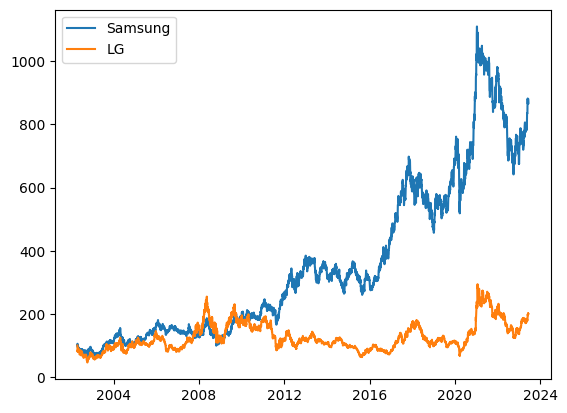

In [57]:
plt.plot(df_merged['samsung_norm'], label = 'Samsung')
plt.plot(df_merged['lg_norm'], label = 'LG')
plt.legend()
plt.show()

## **3. Simple Misleading Forcasting Example**

#### Model specification (misleading)

$$
P_{t+1} = \alpha \cdot 1 + \beta \cdot P_t + \epsilon_{t+1}
$$

Model assumes a certain linear relationship between next period price and current period price.\
Let's estimate the coefficienta and the intercept from OLS.

In [58]:
#pd.Series #single bracket
samsung = df_merged['samsung']

In [59]:
samsung.head(3)

date
2002-04-22    8200
2002-04-23    8540
2002-04-24    8640
Name: samsung, dtype: int64

In [60]:
#explanatory variable: today price
today = samsung.iloc[:-1]

#target variable: tomorrow price
tmr = samsung.iloc[1:]

In [61]:
print(today.head(1))
print(tmr.head(1))
print(today.tail(1))
print(tmr.tail(1))

date
2002-04-22    8200
Name: samsung, dtype: int64
date
2002-04-23    8540
Name: samsung, dtype: int64
date
2023-06-08    70900
Name: samsung, dtype: int64
date
2023-06-09    72000
Name: samsung, dtype: int64


In [62]:
import statsmodels.api as sm

In [63]:
X = sm.add_constant(today)
X

,const,samsung
date,,
2002-04-22,1.0,8200
2002-04-23,1.0,8540
2002-04-24,1.0,8640
2002-04-25,1.0,8260
2002-04-26,1.0,8000
...,...,...
2023-06-01,1.0,70900
2023-06-02,1.0,72200
2023-06-05,1.0,71700


In [64]:
# step 1. train
model = sm.OLS(tmr, X.values)

# step 2. Estimation
results = model.fit()

# step 3. results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                samsung   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.968e+06
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:08:06   Log-Likelihood:                -40574.
No. Observations:                5225   AIC:                         8.115e+04
Df Residuals:                    5223   BIC:                         8.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1654     13.574      1.044      0.297     -12.446      40.777
x1             0.9999      0.000   2639.682      0.000       0.999       1.001
==============================================================================
Omnibus:                     1019.503   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13551.203
Skew:                           0.543   Prob(JB):                         0.00
Kurtosis:                      10.814   Cond. No.                     6.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Check out the R-squared. It is nearly 100%. Does this mean we found the perfect model?\
> This is complete garbage actually. We will dig into it deeper in our next Jupyter Notebook file why it is so.